####


EDA
1. Read csv
2. Clean data
3. Read data
a. What subscription types are there?
b. Is it a monthly subscription? Or yearly?
c. What are the different prices of the subscriptions?
4. Visualise Data
a. Sales per Month
b. Most Popular Subscription Type
c. Gender VS Subscription Type
d. Number of Users VS Country

In [8]:
!pip3 install pandas

In [9]:
import pandas as pd         # data manipulation & analysis
import numpy as np          # numerical & mathematical operations
import matplotlib.pyplot as plt         # for creating visualisations
import seaborn as  sns          # for more advanced visualisations 

In [10]:
df = pd.read_csv('/Users/juninho/Desktop/MY-DAC-Curriculum/DAC-004_EDA/Netflix_Userbase.csv')


In [4]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [17]:
#clean
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [7]:
df.shape

(2500, 10)

In [8]:
df.info

<bound method DataFrame.info of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

       

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [24]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


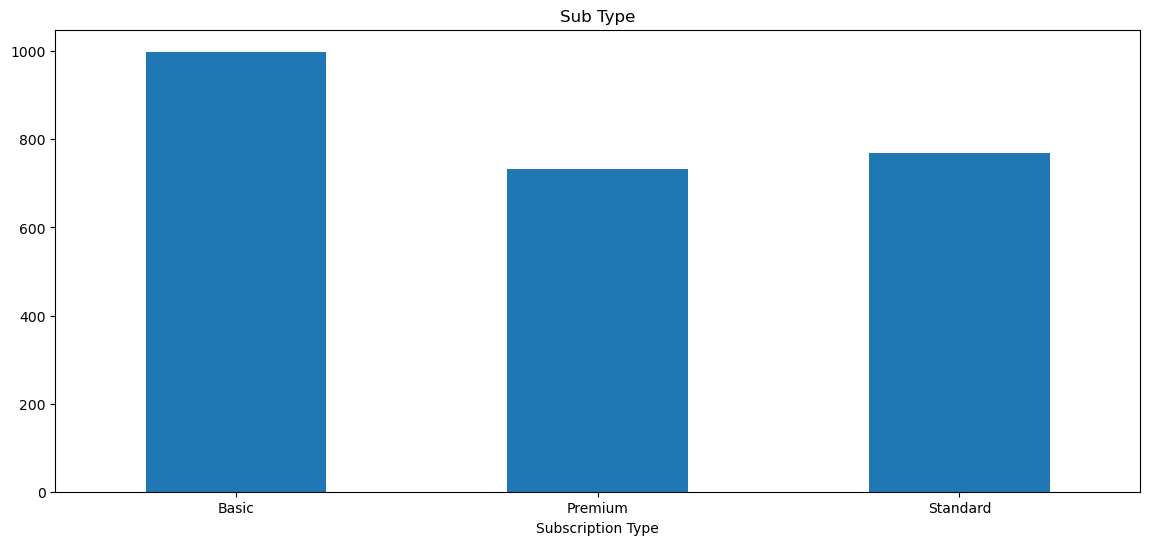

In [27]:
df['Subscription Type'].value_counts().sort_index().plot(kind='bar', title='Sub Type')
plt.rcParams['figure.figsize'] = (14, 6)
plt.xticks(rotation=0)
plt.show()

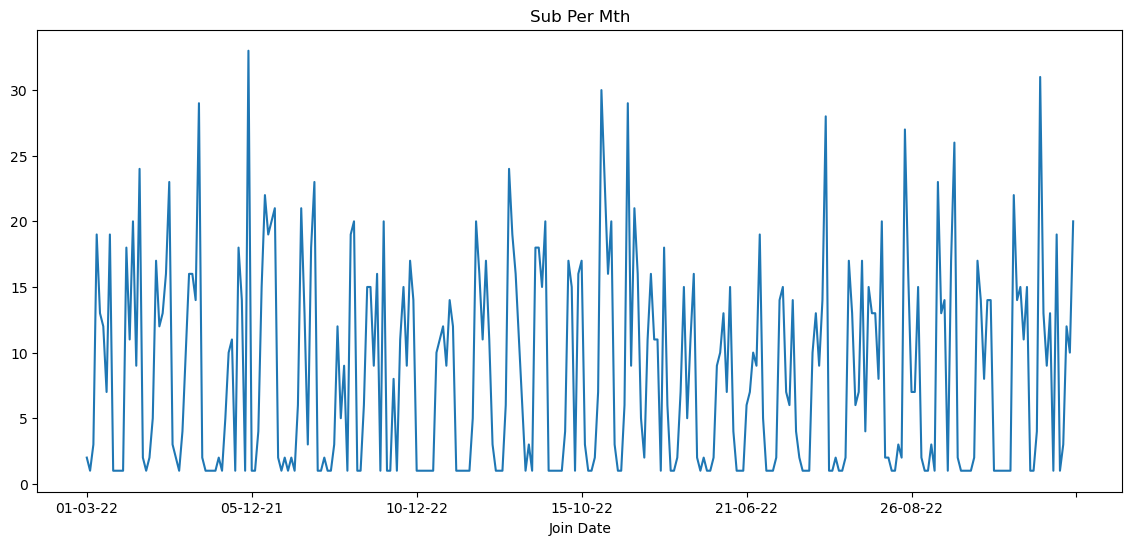

In [29]:
df['Join Date'].value_counts().sort_index().plot(kind='line', title='Sub Per Mth')
plt.rcParams['figure.figsize'] = (14, 6)
plt.xticks(rotation=0)
plt.show()

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_11953/1886210866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Subs_Country = sns.countplot(x = 'Country', data = df, palette = 'deep')


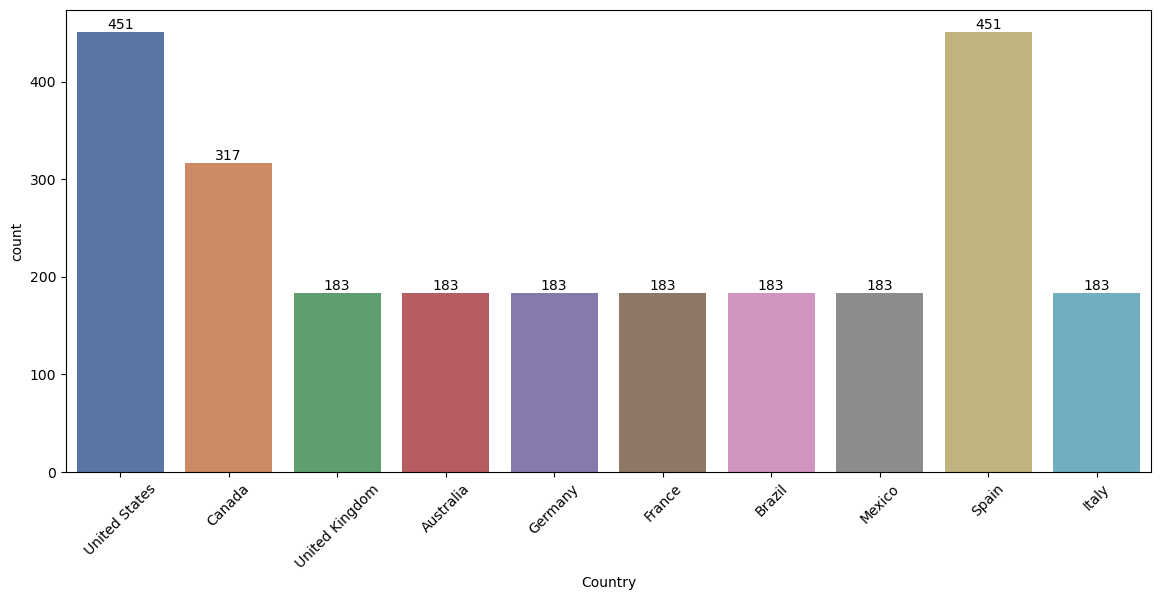

In [41]:
#Number of Users VS Country
Subs_Country = sns.countplot(x = 'Country', data = df, palette = 'deep')

plt.rcParams['figure.figsize'] = (14, 6)
for bars in Subs_Country.containers:
    Subs_Country.bar_label(bars)

    plt.xticks(rotation=45)

In [13]:
#Gender VS Subscription Type
Sub_vs_Gender = df.groupby (['Subscription Type'], as_index = False)['Gender'].sum().sort_values(by = 'Gender', ascending = False)
